In [7]:
import os
import json

kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

token = {
    "username": "auvzchet",
    "key": "3d59cbe649d12904ce4b1e876665d54"
}

config_file_path = os.path.join(kaggle_dir, 'kaggle.json')
with open(config_file_path, 'w') as config_file:
    json.dump(token, config_file)

os.chmod(config_file_path, 0o600)

In [10]:
import zipfile
zipref=zipfile.ZipFile("/content/labeled-chest-xray-images.zip",'r')
zipref.extractall()
zipref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/labeled-chest-xray-images.zip'

In [ ]:
train_dir="/content/chest_xray/train/"
test_dir="/content/chest_xray/test/"

In [ ]:
# /content/chest_xray/test/NORMAL

(696, 1056)


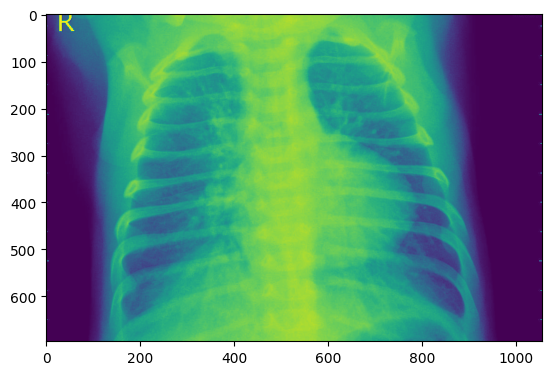

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

fpath=r'/content/chest_xray/train/PNEUMONIA/BACTERIA-1027194-0001.jpeg'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

['NORMAL-1505602-0002.jpeg']
image shape : (1630, 2124)


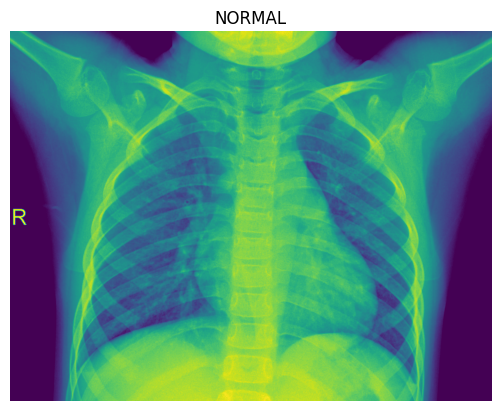

In [ ]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "NORMAL")

['VIRUS-103798-0003.jpeg']
image shape : (936, 1320)


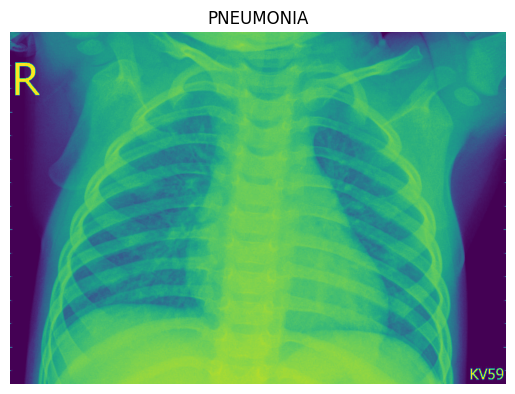

In [ ]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "PNEUMONIA")

In [ ]:
# 167/255 = -- 0 to 1 range ... 0 to 255

# 200x200 --- 100 x 100 ----121 x 200 ---> 60 x 50 --> 120x 100

# data loading --> preporocessing / normalization + rshaping+ noise ---> model training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale = 1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model_xray_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(320,320,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_xray_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_xray_1.summary()
history_xray_1 = model_xray_1.fit(train_data, epochs=5) # calbacks == save best model 21 st ... last model --- 25th

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 318, 318, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 159, 159, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 157, 157, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 60840)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │          60,841 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,031 (242.31 KB)

 Trainable params: 62,031 (242.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 65s 370ms/step - accuracy: 0.8334 - loss: 0.3656
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 61s 359ms/step - accuracy: 0.9656 - loss: 0.0909
Epoch 3/5
128/164 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - accuracy: 0.9746 - loss: 0.0686

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [ ]:
# Show original image and augmented image
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
def load_prep(filename,img_shape=180):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

def pred_and_plot(model, filename, class_names):
  import numpy as np
  img = load_prep(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  result=pred.argmax()
  pred_class = class_names[result]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1061.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1140.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1680.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-100.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-1004.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-5267.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-524.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1095.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1120.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1148.png

In [ ]:
pred_and_plot(model3, "COVID-1061.png", class_names)

In [ ]:
pred_and_plot(model3, "COVID-1140.png", class_names)

In [ ]:
pred_and_plot(model3, "COVID-1680.png", class_names)

In [ ]:
pred_and_plot(model3, "Normal-100.png", class_names)

In [ ]:
pred_and_plot(model3, "Normal-1004.png", class_names)

In [ ]:
pred_and_plot(model3,"Normal-5267.png.1", class_names)

In [ ]:
pred_and_plot(model3,"Normal-524.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1095.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1120.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1148.png", class_names)